# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

637

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Set base url/units variables. Combine them to get the query url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Create empty lists to store the data for each field
city_id_list = []
city_name_list = []
country_list = []
lng_list = []
lat_list = []
temp_list = []
humidity_list = []
clouds_list = []
wind_speed_list = []

# Loop through cities
for city in cities:
    
    # Get the JSON response from the OpenWeather API
    response_json = requests.get(query_url + city).json()
    
    # Start the error handling
    # Retrieve the items for each field and append them to the empty lists  
    try:
        
        city_id = response_json['id']
        city_id_list.append(city_id)
            
        city_name = response_json['name']
        city_name_list.append(city_name)
        
        country_name = response_json['sys']['country']
        country_list.append(country_name)

        lng = response_json['coord']['lon']
        lng_list.append(lng)

        lat = response_json['coord']['lat']
        lat_list.append(lat)

        temp = response_json['main']['temp']
        temp_list.append(temp)

        humidity = response_json['main']['humidity']
        humidity_list.append(humidity)

        clouds = response_json['clouds']['all']
        clouds_list.append(clouds)

        wind_speed = response_json['wind']['speed']
        wind_speed_list.append(wind_speed)
    
        print(f"City Name: {city}, City ID: {city_id}")
    
    # Print error message and move on to the next city if there is an error
    except:
        
        print("That record does not exist, searching for next record...")

City Name: sao francisco, City ID: 3449176
That record does not exist, searching for next record...
City Name: longyearbyen, City ID: 2729907
City Name: tecoanapa, City ID: 3516171
City Name: saskylakh, City ID: 2017155
City Name: nemuro, City ID: 2128975
City Name: mataura, City ID: 6201424
City Name: khatanga, City ID: 2022572
City Name: harper, City ID: 2276492
City Name: rikitea, City ID: 4030556
City Name: yulara, City ID: 6355222
City Name: port lincoln, City ID: 2063036
City Name: teguise, City ID: 2510573
City Name: upernavik, City ID: 3418910
That record does not exist, searching for next record...
City Name: tasiilaq, City ID: 3424607
City Name: chuy, City ID: 3443061
City Name: east london, City ID: 1006984
City Name: paramirim, City ID: 3455082
City Name: kaitangata, City ID: 2208248
City Name: saint-pierre, City ID: 935214
City Name: bluff, City ID: 2206939
City Name: tuktoyaktuk, City ID: 6170031
City Name: kahului, City ID: 5847411
City Name: bonavista, City ID: 5905393


City Name: bubaque, City ID: 2374583
City Name: iquique, City ID: 3887127
City Name: szod, City ID: 3044371
City Name: grindavik, City ID: 3416888
City Name: saint anthony, City ID: 5044290
City Name: eureka, City ID: 5563397
City Name: puri, City ID: 1259184
City Name: neiafu, City ID: 4032420
City Name: mackay, City ID: 2159220
City Name: sonoma, City ID: 5397100
City Name: grenada, City ID: 2517117
City Name: purpe, City ID: 1539210
City Name: daru, City ID: 2098329
City Name: bowen, City ID: 2174444
City Name: umuarama, City ID: 3445782
City Name: bathsheba, City ID: 3374083
That record does not exist, searching for next record...
City Name: clyde river, City ID: 5924351
City Name: bulaevo, City ID: 1525014
City Name: wajir, City ID: 178443
City Name: dabakala, City ID: 2290609
City Name: port hedland, City ID: 2063042
City Name: huarmey, City ID: 3939168
City Name: mahuva, City ID: 1267454
City Name: horsham, City ID: 2646557
That record does not exist, searching for next record..

City Name: vanimo, City ID: 2084442
City Name: alexandria, City ID: 361058
City Name: kizilskoye, City ID: 493160
City Name: tarata, City ID: 3903342
City Name: kruisfontein, City ID: 986717
City Name: bereda, City ID: 3105522
That record does not exist, searching for next record...
City Name: robe, City ID: 2062381
City Name: ekhabi, City ID: 2122614
City Name: novoagansk, City ID: 1497210
City Name: ca mau, City ID: 1586443
City Name: nyurba, City ID: 2018735
City Name: ailigandi, City ID: 3714956
City Name: namibe, City ID: 3347019
City Name: phalombe, City ID: 924206
City Name: port hawkesbury, City ID: 6111867
City Name: aguimes, City ID: 2522325
City Name: sinnamary, City ID: 3380290
City Name: mahajanga, City ID: 1062663
City Name: najran, City ID: 103630
City Name: caravelas, City ID: 3466980
City Name: ucluelet, City ID: 6171633
City Name: iqaluit, City ID: 5983720
City Name: dumas, City ID: 5520552
City Name: bayir, City ID: 304183
City Name: whitehorse, City ID: 6180550
City

City Name: huamachuco, City ID: 3696509
City Name: komsomolskiy, City ID: 1513491
City Name: turbat, City ID: 1163054
City Name: san ignacio, City ID: 3581194
City Name: tomigusuku, City ID: 1850108
City Name: teahupoo, City ID: 4033543
City Name: camapua, City ID: 3468020
City Name: nome, City ID: 5870133
City Name: farsund, City ID: 3157799
City Name: vilhena, City ID: 3924679
City Name: bosaso, City ID: 64013
City Name: berehove, City ID: 712423
City Name: perez, City ID: 3841500
City Name: kavaratti, City ID: 1267390
City Name: muravlenko, City ID: 1540711
That record does not exist, searching for next record...


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [ ]:
# Convert the data into a dataframe
cities_df = pd.DataFrame({"City ID": city_id_list, "City": city_name_list, "Country": country_list, "Lat": lat_list, "Lng": lng_list,
                         "Temperature": temp_list, "Humidity": humidity_list, "Clouds": clouds_list,
                         "Wind Speed": wind_speed_list})
cities_df.head()

In [ ]:
# Export to .csv file
cities_df.to_csv("Output/city_weather.csv", index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

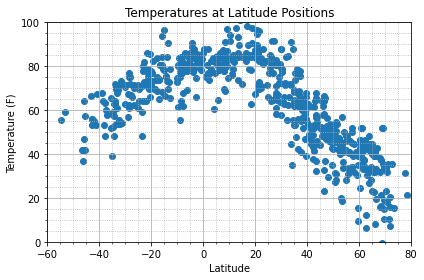

In [8]:
x_values = cities_df["Lat"]
y_values = cities_df["Temperature"]

plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(0, 100)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()

plt.savefig("LatitudeVsTemperature")
plt.show()

## Latitude vs. Humidity Plot

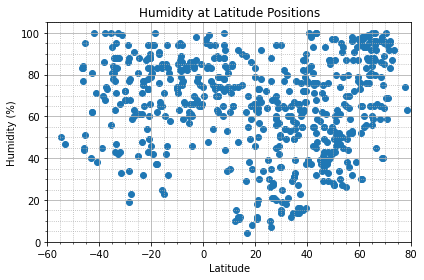

In [7]:
x_values = cities_df["Lat"]
y_values = cities_df["Humidity"]

plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()

plt.savefig("LatitudeVsHumidity")
plt.show()

## Latitude vs. Cloudiness Plot

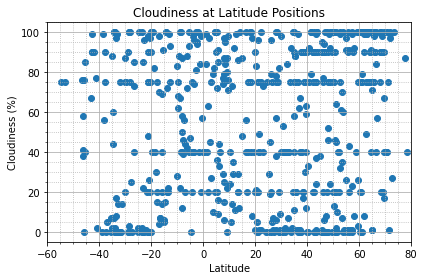

In [9]:

x_values = cities_df["Lat"]
y_values = cities_df["Clouds"]

plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()

plt.savefig("LatitudeVsCloudiness")
plt.show()

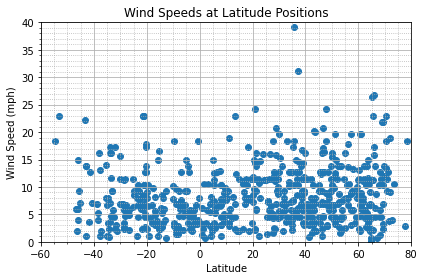

In [10]:
x_values = cities_df["Lat"]
y_values = cities_df["Wind Speed"]

plt.scatter(x_values,y_values)
plt.title('Wind Speeds at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 40)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()

plt.savefig("LatitudeVsWindSpeed")
plt.show()

## Latitude vs. Wind Speed Plot

## Linear Regression

In [23]:
northern_x_v = cities_df[cities_df['Lat']<1]
southern_x_v = cities_df[cities_df['Lat']>1]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8719153529708936


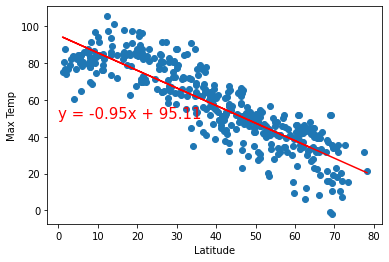

In [25]:

x_values =southern_x_v['Lat']

y_values = southern_x_v['Temperature']
# plt.scatter(x_values,y_values)
# plt.xlabel('Rooms in House')
# plt.ylabel('Median House Prices ($1000)')
# plt.show()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue}")

plt.savefig("NHMaxTempVsLatitudeLinRegression")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7494839575864313


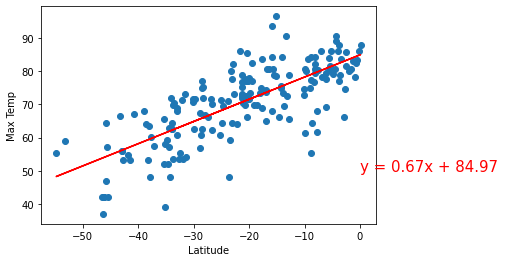

In [27]:
x_values=northern_x_v['Lat']

y_values = northern_x_v['Temperature']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue}")

plt.savefig("SHMaxTempVsLatitudeLinRegression")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

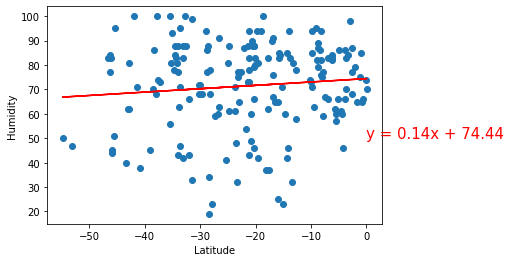

In [28]:
x_values =northern_x_v['Lat']

y_values = northern_x_v['Humidity']
# plt.scatter(x_values,y_values)
# plt.xlabel('Rooms in House')
# plt.ylabel('Median House Prices ($1000)')
# plt.show()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.savefig("NHHumidityVSLatLinRegression")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.17562336617575003


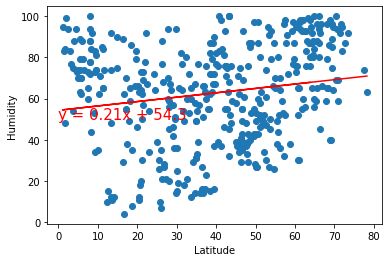

In [29]:
x_values =southern_x_v['Lat']

y_values = southern_x_v['Humidity']
# plt.scatter(x_values,y_values)
# plt.xlabel('Rooms in House')
# plt.ylabel('Median House Prices ($1000)')
# plt.show()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue}")

plt.savefig("NHHumidityVSLatLinRegression")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.09983449732620357


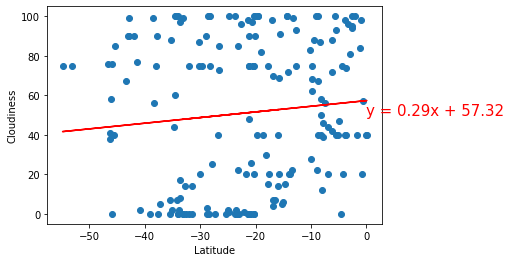

In [32]:
x_values =northern_x_v['Lat']

y_values = northern_x_v['Clouds']
# plt.scatter(x_values,y_values)
# plt.xlabel('Rooms in House')
# plt.ylabel('Median House Prices ($1000)')
# plt.show()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue}")

plt.savefig("NHCloudinessVsLatLinRegression")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.14569878071819564


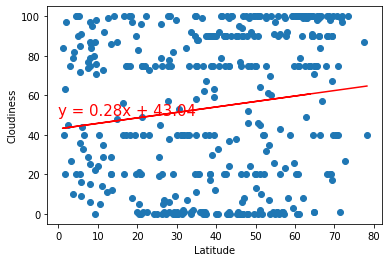

In [33]:
x_values =southern_x_v['Lat']

y_values = southern_x_v['Clouds']
# plt.scatter(x_values,y_values)
# plt.xlabel('Rooms in House')
# plt.ylabel('Median House Prices ($1000)')
# plt.show()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue}")

plt.savefig("NHCloudinessVsLatLinRegression")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.19668489309020667


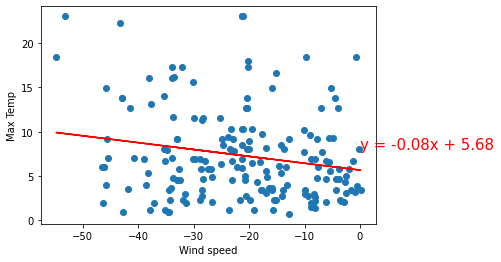

In [34]:
x_values = northern_x_v['Lat']

y_values = northern_x_v['Wind Speed']
# plt.scatter(x_values,y_values)
# plt.xlabel('Rooms in House')
# plt.ylabel('Median House Prices ($1000)')
# plt.show()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,8),fontsize=15,color="red")
plt.xlabel('Wind speed')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue}")

plt.savefig("NHWindSpeedVsLatLinRegression")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.12422850843320567


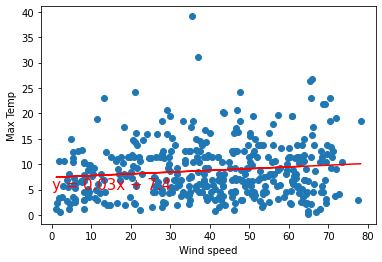

In [35]:
x_values = southern_x_v['Lat']

y_values = southern_x_v['Wind Speed']
# plt.scatter(x_values,y_values)
# plt.xlabel('Rooms in House')
# plt.ylabel('Median House Prices ($1000)')
# plt.show()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,5),fontsize=15,color="red")
plt.xlabel('Wind speed')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue}")

plt.savefig("SHWindSpeedVsLatLinRegression")
plt.show()